<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [1]:
#Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import geopandas as gpd

###Importing Data

In [2]:
#Loading data from github directly using raw file
data = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru1972_2022.csv")
data

,datetime,rain,temp_min,temp_max
0,1972-01-01,0.0000,16.1600,27.9200
1,1972-01-02,0.0000,15.0800,27.7900
2,1972-01-03,0.0000,13.6800,28.7300
3,1972-01-04,0.0000,14.1500,28.9200
4,1972-01-05,0.0000,13.6800,28.4400
...,...,...,...,...
18623,2022-12-27,1.3664,20.2516,27.6140
18624,2022-12-28,0.2756,19.9058,29.5648
18625,2022-12-29,0.0000,18.8444,29.6711
18626,2022-12-30,0.0000,17.6626,29.0639


In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['month'] = data['datetime'].dt.month

In [4]:
#Loading geojson file from github which is having geographical wards data for bangalore
shp_gdf = gpd.read_file("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/BBMP.geojson")
shp_gdf.head()

,KGISWardID,KGISWardCode,LGD_WardCode,KGISWardNo,KGISWardName,KGISTownCode,geometry
0,4878,2003001,1303139.0,1,Kempegowda Ward,2003,"POLYGON ((77.61545 13.13028, 77.61549 13.13040..."
1,4879,2003002,1303140.0,2,Chowdeswari Ward,2003,"POLYGON ((77.57375 13.13736, 77.57370 13.13721..."
2,4882,2003003,1303141.0,3,Someshwara Ward,2003,"POLYGON ((77.56257 13.11640, 77.56252 13.11643..."
3,4883,2003004,1303142.0,4,Atturu Layout,2003,"POLYGON ((77.55155 13.10086, 77.55149 13.10086..."
4,4886,2003005,1303143.0,5,Yelahanka Satellite Town,2003,"POLYGON ((77.59084 13.07785, 77.59101 13.07826..."


In [5]:
data.head()

,datetime,rain,temp_min,temp_max,month
0,1972-01-01,0.0,16.16,27.92,1
1,1972-01-02,0.0,15.08,27.79,1
2,1972-01-03,0.0,13.68,28.73,1
3,1972-01-04,0.0,14.15,28.92,1
4,1972-01-05,0.0,13.68,28.44,1


In [6]:
#Seggregating seasonal average of months from June-September to plot rain
sort_month = pd.DataFrame()
for i in [6,7,8,9]:
  temp=data[data['month']==i]
  sort_month = pd.concat([sort_month, temp])
sort_month['month'].unique()

array([6, 7, 8, 9], dtype=int32)

In [16]:
sort_month['ward'] = np.random.choice(shp_gdf['KGISWardNo'], size=len(sort_month))
temp_data = sort_month.groupby('ward')['rain'].mean()
len(shp_gdf['KGISWardCode'].unique())
merged = shp_gdf.set_index('KGISWardNo').join(temp_data)

In [8]:
merged

,KGISWardID,KGISWardCode,LGD_WardCode,KGISWardName,KGISTownCode,geometry,rain
KGISWardNo,,,,,,,
1,4878,2003001,1303139.0,Kempegowda Ward,2003,"POLYGON ((77.61545 13.13028, 77.61549 13.13040...",3.024188
2,4879,2003002,1303140.0,Chowdeswari Ward,2003,"POLYGON ((77.57375 13.13736, 77.57370 13.13721...",1.694662
3,4882,2003003,1303141.0,Someshwara Ward,2003,"POLYGON ((77.56257 13.11640, 77.56252 13.11643...",6.016736
4,4883,2003004,1303142.0,Atturu Layout,2003,"POLYGON ((77.55155 13.10086, 77.55149 13.10086...",6.849155
5,4886,2003005,1303143.0,Yelahanka Satellite Town,2003,"POLYGON ((77.59084 13.07785, 77.59101 13.07826...",4.312387
...,...,...,...,...,...,...,...
35,4946,2003035,1302707.0,Hemmigepura,2003,"POLYGON ((77.46301 12.89810, 77.46289 12.89804...",3.217676
182,5239,2003182,1302854.0,Shanthi Nagar,2003,"POLYGON ((77.60179 12.95715, 77.60086 12.95745...",5.620915
183,5242,2003183,1302855.0,Neelasandra,2003,"POLYGON ((77.61210 12.95845, 77.61215 12.95890...",1.887674


In [14]:
merged.head()

,KGISWardID,KGISWardCode,LGD_WardCode,KGISWardName,KGISTownCode,geometry,rain
KGISWardNo,,,,,,,
1,4878,2003001,1303139.0,Kempegowda Ward,2003,"POLYGON ((77.61545 13.13028, 77.61549 13.13040...",2.492400
2,4879,2003002,1303140.0,Chowdeswari Ward,2003,"POLYGON ((77.57375 13.13736, 77.57370 13.13721...",2.717777
3,4882,2003003,1303141.0,Someshwara Ward,2003,"POLYGON ((77.56257 13.11640, 77.56252 13.11643...",2.371462
4,4883,2003004,1303142.0,Atturu Layout,2003,"POLYGON ((77.55155 13.10086, 77.55149 13.10086...",0.615057
5,4886,2003005,1303143.0,Yelahanka Satellite Town,2003,"POLYGON ((77.59084 13.07785, 77.59101 13.07826...",2.031053


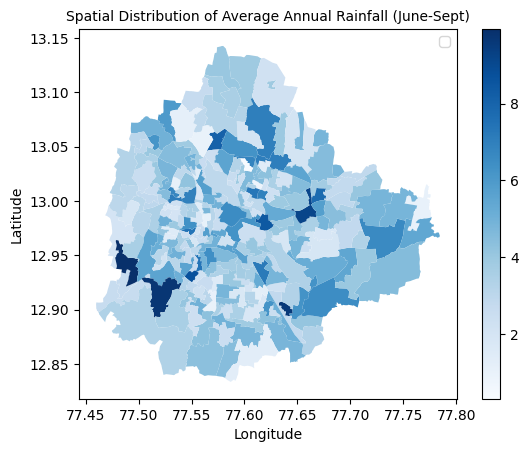

In [17]:
#Plotting spatial map for bangalore region showing june to september data of rain
merged.plot(column='rain', cmap='Blues', legend=True)
plt.title('Spatial Distribution of Average Annual Rainfall (June-Sept)', fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.legend()

In [23]:
data['ward'] = np.random.choice(shp_gdf['KGISWardNo'], size=len(data))
temp_data = data.groupby('ward')['rain'].mean()
len(shp_gdf['KGISWardCode'].unique())
merged = shp_gdf.set_index('KGISWardNo').join(temp_data)

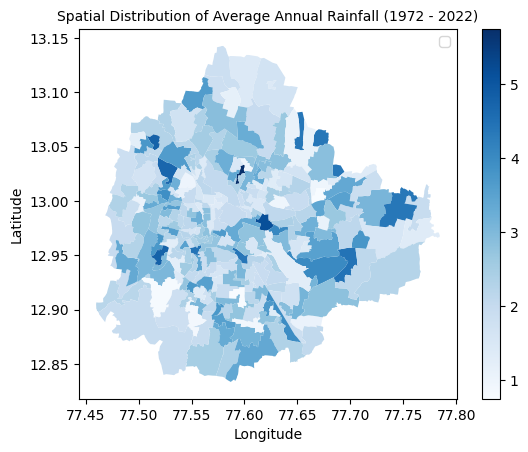

In [24]:
#Plotting spatial map for bangalore region showing annual data of rain
merged.plot(column='rain', cmap='Blues', legend=True)
plt.title('Spatial Distribution of Average Annual Rainfall (1972 - 2022)', fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.legend()

In [32]:
data['ward'] = np.random.choice(shp_gdf['KGISWardNo'], size=len(data))
temp_data = data.groupby('ward')['temp_max'].mean()
len(shp_gdf['KGISWardCode'].unique())
merged = shp_gdf.set_index('KGISWardNo').join(temp_data)

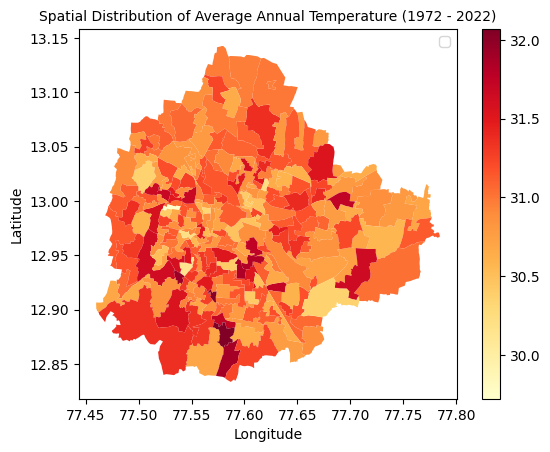

In [34]:
#Plotting spatial map for bangalore region showing annual data of temperature as heatmap
merged.plot(column='temp_max', cmap='YlOrRd', legend=True)
plt.title('Spatial Distribution of Average Annual Temperature (1972 - 2022)', fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.legend()
